# Analyse the pattern of weather of all countries

In [24]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [3]:
weather = pd.read_csv('weatherdataset.csv')
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2016-03-19,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,9,17,18,17,36,10,58,0.0,1023,22,10,125,27,Argentina
1,2016-03-20,22,16,0.0,11.6,5,80,05:38 PM,04:15 AM,06:58 AM,07:05 PM,10,19,19,19,29,22,58,0.1,1022,22,10,95,21,Argentina
2,2016-03-21,24,17,0.0,10.3,5,87,06:11 PM,05:10 AM,06:59 AM,07:04 PM,14,20,21,20,20,58,69,3.4,1017,24,10,95,15,Argentina
3,2016-03-22,28,19,0.0,11.6,6,94,06:44 PM,06:05 AM,07:00 AM,07:02 PM,16,24,24,23,11,2,65,0.0,1016,28,10,117,8,Argentina
4,2016-03-23,30,17,0.0,11.6,6,100,07:16 PM,06:59 AM,07:01 AM,07:01 PM,14,24,24,23,19,2,60,0.0,1015,30,10,139,14,Argentina


In [6]:
# Convert our report_date columns to datetime datatype
weather['date_time'] = pd.to_datetime(weather['date_time'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date_time']).year
weather['month'] = pd.DatetimeIndex(weather['date_time']).month

In [7]:
weather.shape

(7420, 27)

# 1 Argentina

In [9]:
argentina_weather = weather[weather['location'] == 'Argentina']
argentina_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
0,2016-03-19,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,9,17,18,17,36,10,58,0.0,1023,22,10,125,27,Argentina,2016,3
1,2016-03-20,22,16,0.0,11.6,5,80,05:38 PM,04:15 AM,06:58 AM,07:05 PM,10,19,19,19,29,22,58,0.1,1022,22,10,95,21,Argentina,2016,3
2,2016-03-21,24,17,0.0,10.3,5,87,06:11 PM,05:10 AM,06:59 AM,07:04 PM,14,20,21,20,20,58,69,3.4,1017,24,10,95,15,Argentina,2016,3
3,2016-03-22,28,19,0.0,11.6,6,94,06:44 PM,06:05 AM,07:00 AM,07:02 PM,16,24,24,23,11,2,65,0.0,1016,28,10,117,8,Argentina,2016,3
4,2016-03-23,30,17,0.0,11.6,6,100,07:16 PM,06:59 AM,07:01 AM,07:01 PM,14,24,24,23,19,2,60,0.0,1015,30,10,139,14,Argentina,2016,3


Text(0.5, 1.0, 'Humidity')

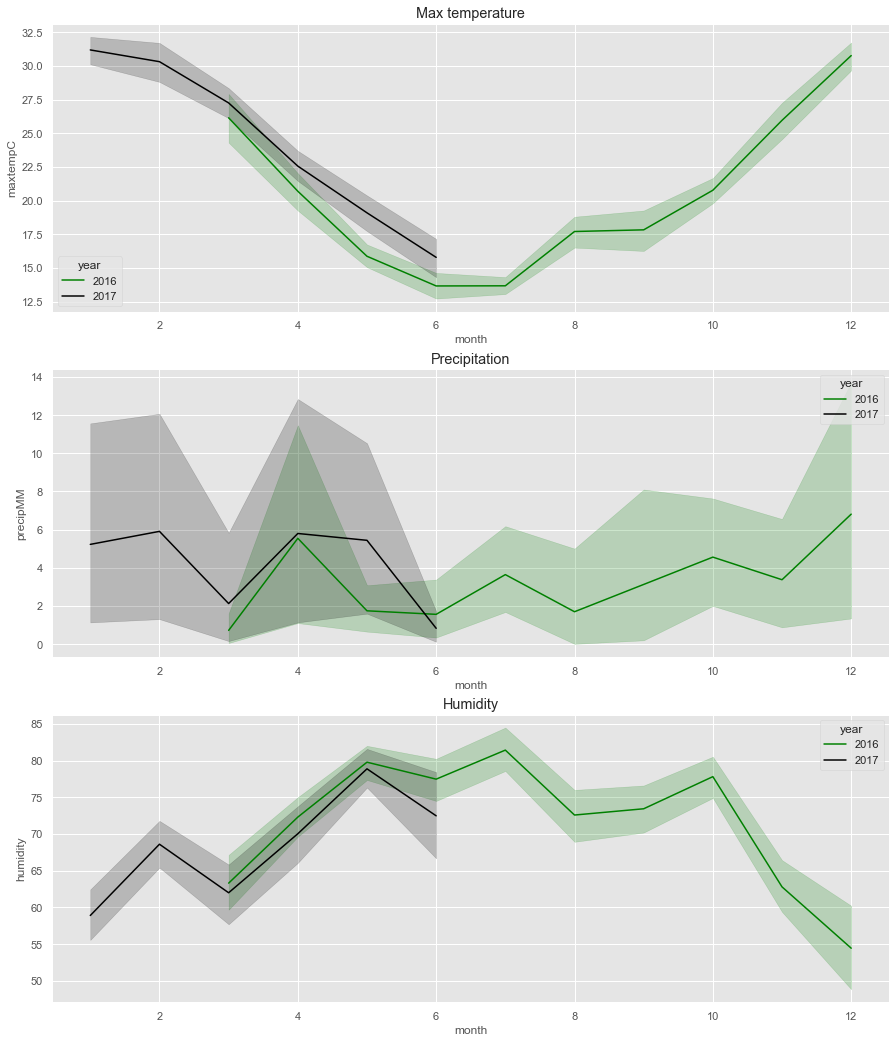

In [28]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=argentina_weather,palette=['green','black'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=argentina_weather,palette=['green','black'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=argentina_weather,palette=['green','black'])
axes[2].set_title('Humidity')

# 2 United states

In [31]:
us_weather = weather[weather['location'] == 'United_States']
us_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
6297,2016-02-16,19,10,0.0,11.1,5,57,01:43 PM,02:39 AM,07:46 AM,06:56 PM,9,14,14,14,17,6,72,0.0,1015,19,10,199,10,United_States,2016,2
6298,2016-02-17,18,12,0.0,11.1,4,64,02:35 PM,03:37 AM,07:45 AM,06:57 PM,9,13,14,13,16,3,73,0.0,1022,18,10,105,10,United_States,2016,2
6299,2016-02-18,21,10,0.0,11.1,5,72,03:30 PM,04:31 AM,07:45 AM,06:58 PM,8,14,15,14,20,0,63,0.0,1026,21,10,127,11,United_States,2016,2
6300,2016-02-19,22,14,0.0,11.2,4,79,04:26 PM,05:22 AM,07:44 AM,06:59 PM,13,17,18,17,22,2,79,0.0,1024,22,9,155,13,United_States,2016,2
6301,2016-02-20,21,15,0.0,5.6,4,87,05:22 PM,06:07 AM,07:43 AM,06:59 PM,16,18,18,18,18,58,86,0.2,1021,21,8,157,11,United_States,2016,2


Text(0.5, 1.0, 'Humidity')

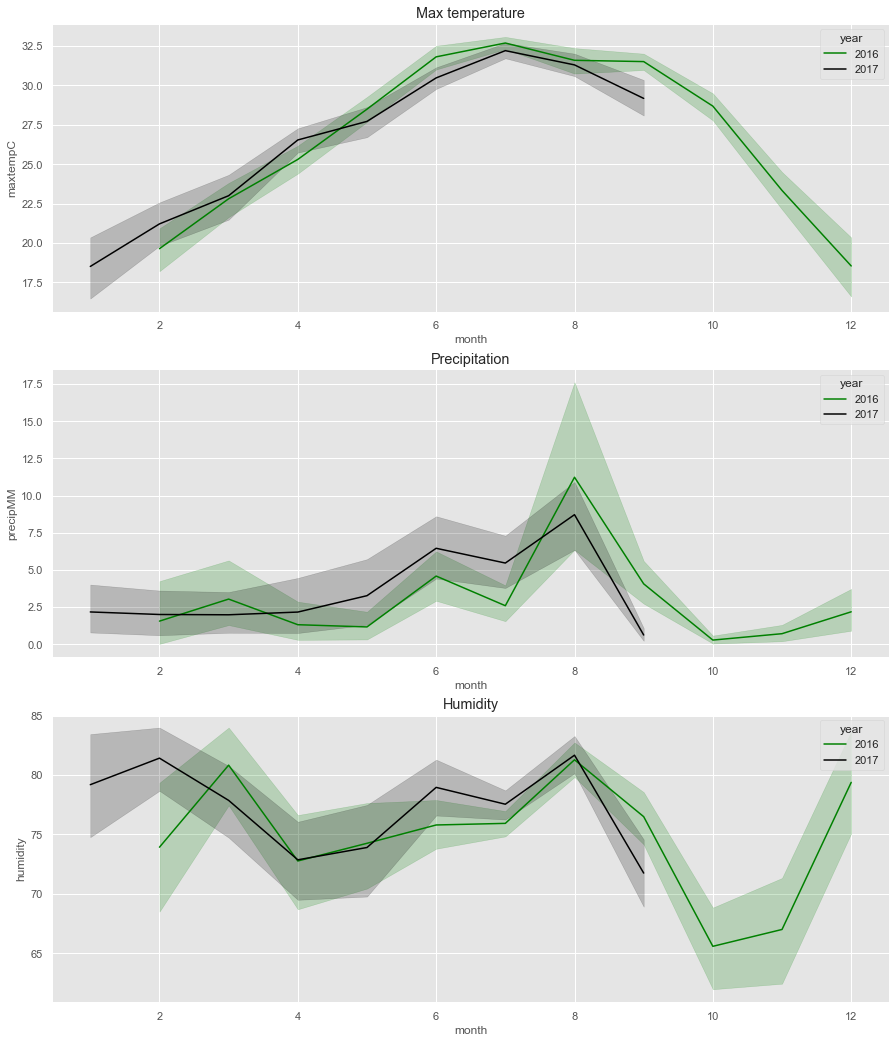

In [32]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=us_weather,palette=['green','black'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=us_weather,palette=['green','black'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=us_weather,palette=['green','black'])
axes[2].set_title('Humidity')

# 3 Brazil

In [33]:
brazil_weather = weather[weather['location'] == 'Brazil']
brazil_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
458,2016-02-13,26,19,0.0,11.6,5,34,10:52 AM,10:54 PM,06:07 AM,06:45 PM,20,23,23,22,8,39,88,20.9,1012,26,9,292,5,Brazil,2016,2
459,2016-02-14,26,18,0.0,11.6,5,42,11:50 AM,11:44 PM,06:07 AM,06:44 PM,20,23,23,22,10,30,87,22.2,1012,26,8,311,7,Brazil,2016,2
460,2016-02-15,26,18,0.0,11.6,5,49,12:48 PM,No moonset,06:07 AM,06:44 PM,19,23,23,22,15,32,85,8.4,1013,26,8,191,10,Brazil,2016,2
461,2016-02-16,27,18,0.0,11.6,5,57,01:46 PM,12:36 AM,06:08 AM,06:43 PM,18,23,23,22,11,18,81,2.4,1014,27,10,45,7,Brazil,2016,2
462,2016-02-17,29,18,0.0,11.6,5,64,02:41 PM,01:29 AM,06:08 AM,06:43 PM,19,24,24,23,12,15,79,0.8,1013,29,9,63,8,Brazil,2016,2


Text(0.5, 1.0, 'Humidity')

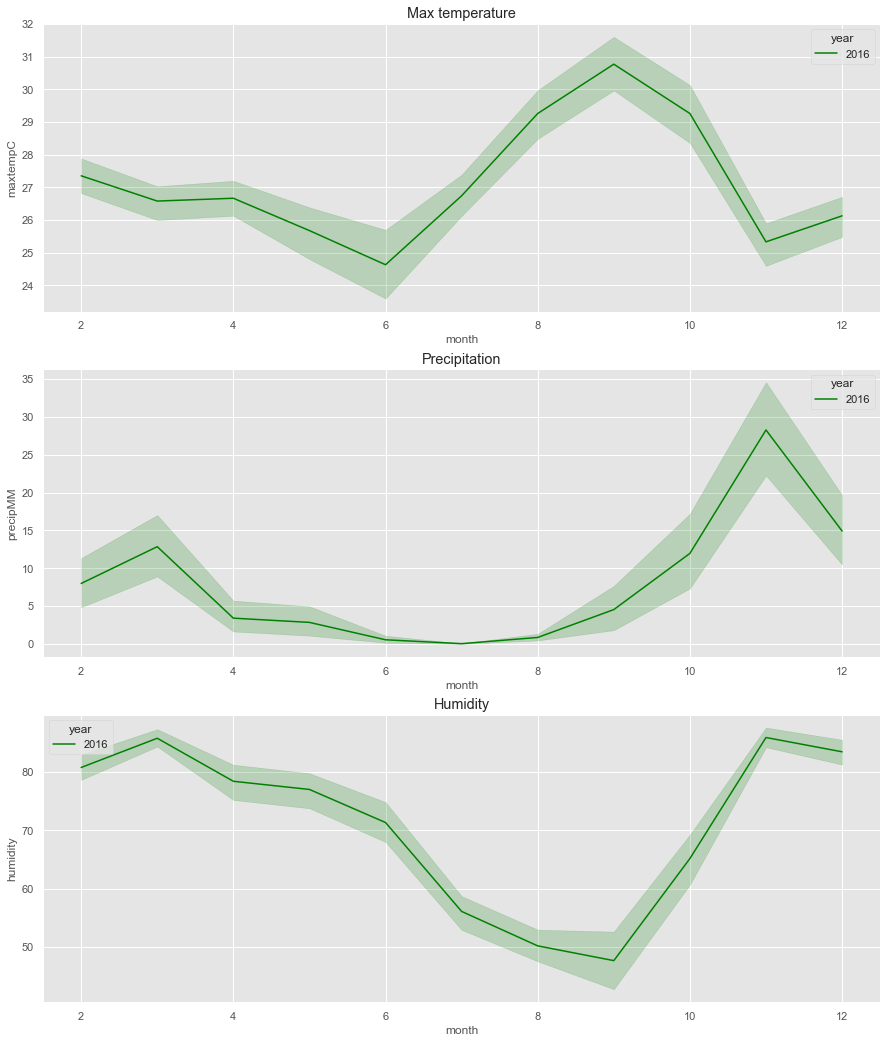

In [36]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=brazil_weather,palette=['green'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=brazil_weather,palette=['green'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=brazil_weather,palette=['green'])
axes[2].set_title('Humidity')

# 4 Colombia

In [37]:
col_weather = weather[weather['location'] == 'Colombia']
col_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
781,2016-01-09,23,10,0.0,11.6,4,0,05:35 AM,05:48 PM,06:07 AM,06:00 PM,12,16,16,16,3,26,84,5.6,1012,23,8,128,2,Colombia,2016,1
782,2016-01-10,24,9,0.0,11.6,4,0,06:29 AM,06:44 PM,06:07 AM,06:00 PM,11,15,16,15,4,35,81,2.9,1013,24,8,140,2,Colombia,2016,1
783,2016-01-11,23,10,0.0,10.2,4,8,07:23 AM,07:40 PM,06:08 AM,06:00 PM,12,15,16,15,4,33,83,1.0,1014,23,7,133,2,Colombia,2016,1
784,2016-01-12,25,11,0.0,11.6,4,15,08:15 AM,08:34 PM,06:08 AM,06:01 PM,12,16,17,16,3,35,81,1.2,1014,25,8,150,2,Colombia,2016,1
785,2016-01-13,22,11,0.0,11.6,4,22,09:07 AM,09:29 PM,06:08 AM,06:01 PM,11,15,15,15,4,26,81,1.2,1014,22,9,160,2,Colombia,2016,1


Text(0.5, 1.0, 'Humidity')

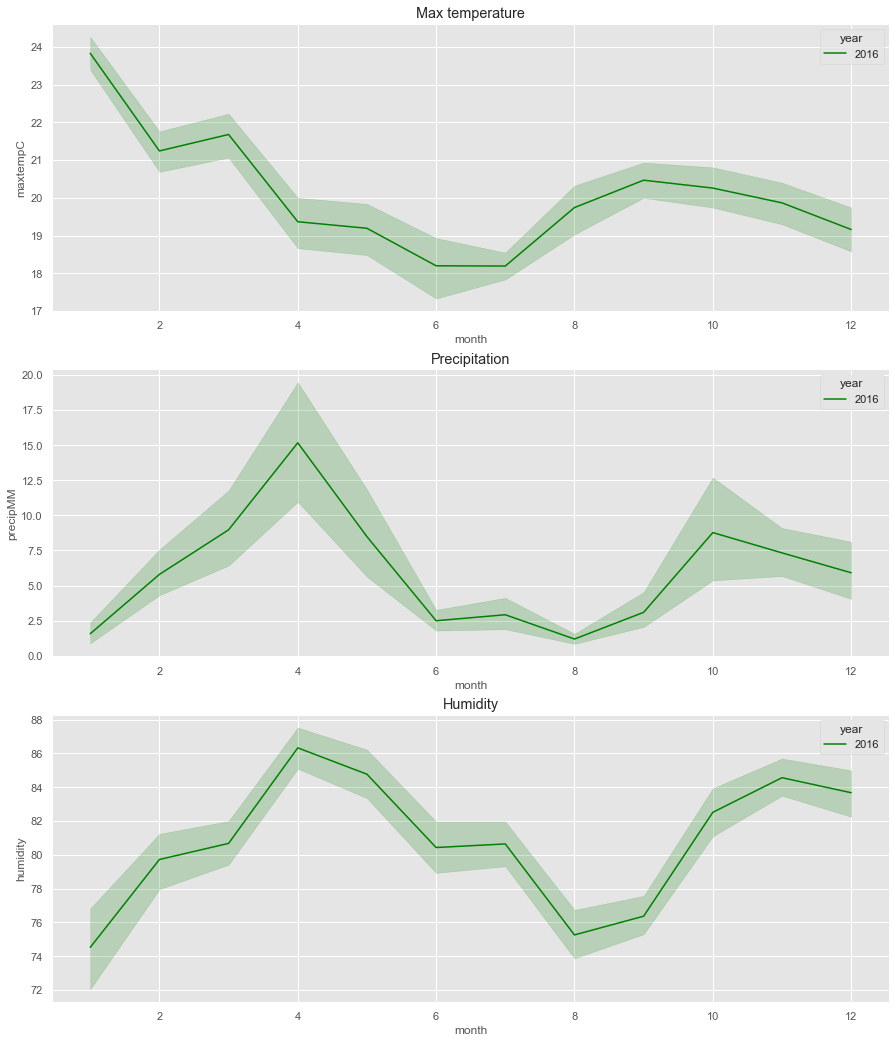

In [42]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=col_weather,palette=['green'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=col_weather,palette=['green'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=col_weather,palette=['green'])
axes[2].set_title('Humidity')

# 5 Dominican Republic

In [45]:
dom_weather = weather[weather['location'] == 'Dominican_Republic']
dom_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
1139,2016-01-09,32,22,0.0,11.1,7,0,06:37 AM,06:11 PM,07:14 AM,06:19 PM,20,28,28,26,11,7,71,0.1,1014,32,10,42,8,Dominican_Republic,2016,1
1140,2016-01-10,34,22,0.0,11.1,7,0,07:30 AM,07:09 PM,07:14 AM,06:20 PM,18,28,28,26,11,0,65,0.0,1015,34,10,38,9,Dominican_Republic,2016,1
1141,2016-01-11,33,22,0.0,11.1,7,8,08:21 AM,08:08 PM,07:14 AM,06:20 PM,19,27,27,25,14,14,70,0.0,1017,33,10,30,10,Dominican_Republic,2016,1
1142,2016-01-12,33,20,0.0,11.1,7,15,09:10 AM,09:07 PM,07:15 AM,06:21 PM,19,26,26,25,15,19,73,0.0,1016,33,10,87,10,Dominican_Republic,2016,1
1143,2016-01-13,31,21,0.0,11.1,7,22,09:58 AM,10:05 PM,07:15 AM,06:22 PM,19,26,26,24,13,24,75,0.6,1016,31,10,44,9,Dominican_Republic,2016,1


Text(0.5, 1.0, 'Humidity')

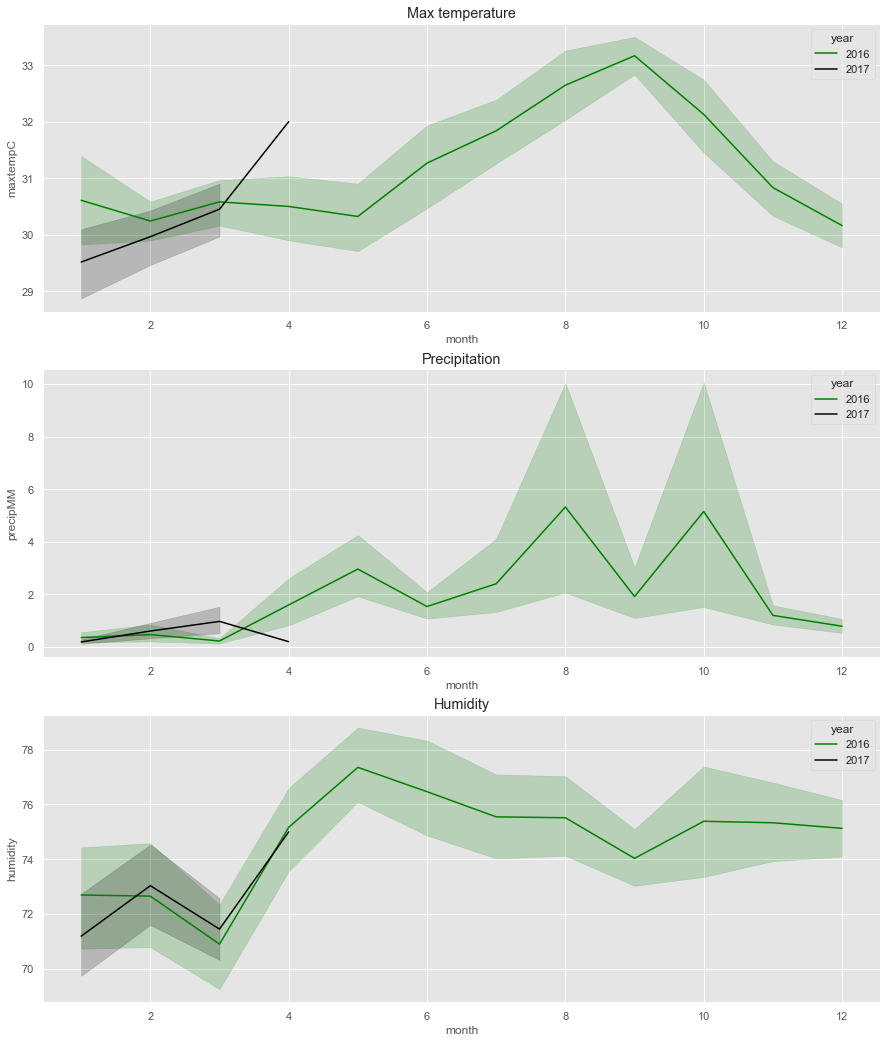

In [47]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=dom_weather,palette=['green','black'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=dom_weather,palette=['green','black'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=dom_weather,palette=['green','black'])
axes[2].set_title('Humidity')

# 6 Ecuador

In [49]:
ecd_weather = weather[weather['location'] == 'Ecuador']
ecd_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
1588,2016-03-30,17,11,0.0,8.8,3,47,No moonrise,11:37 AM,06:15 AM,06:21 PM,12,13,13,13,6,52,93,18.1,1015,17,7,284,4,Ecuador,2016,3
1589,2016-03-31,15,9,0.0,6.0,3,43,12:03 AM,12:28 PM,06:15 AM,06:21 PM,11,12,12,12,6,72,93,15.7,1016,15,7,166,4,Ecuador,2016,3
1590,2016-04-01,15,10,0.0,6.0,3,26,12:54 AM,01:20 PM,06:14 AM,06:21 PM,11,11,12,11,6,97,94,47.8,1015,15,6,242,5,Ecuador,2016,4
1591,2016-04-02,16,8,0.0,7.4,3,19,01:47 AM,02:13 PM,06:14 AM,06:20 PM,10,11,11,11,7,72,92,17.7,1015,16,7,180,5,Ecuador,2016,4
1592,2016-04-03,16,8,0.0,8.8,3,11,02:40 AM,03:06 PM,06:14 AM,06:20 PM,10,11,11,11,8,61,91,11.7,1015,16,7,188,5,Ecuador,2016,4


Text(0.5, 1.0, 'Humidity')

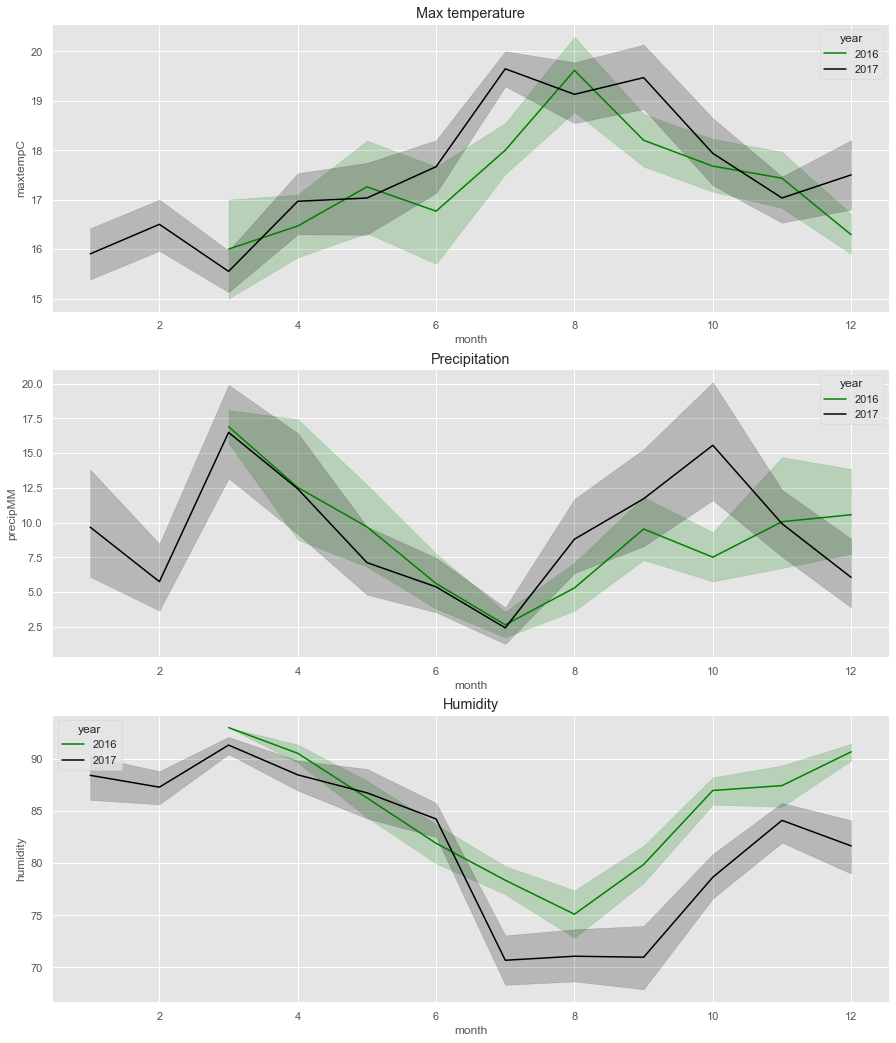

In [50]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=ecd_weather,palette=['green','black'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=ecd_weather,palette=['green','black'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=ecd_weather,palette=['green','black'])
axes[2].set_title('Humidity')

# 7 El Salvador

In [51]:
sal_weather = weather[weather['location'] == 'El_Salvador']
sal_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
2219,2015-11-28,35,21,0.0,8.7,7,78,08:23 PM,08:32 AM,06:03 AM,05:27 PM,19,29,29,27,9,8,64,0.0,1012,35,10,226,6,El_Salvador,2015,11
2220,2015-11-29,33,22,0.0,8.7,7,71,09:18 PM,09:24 AM,06:03 AM,05:27 PM,18,28,28,27,10,3,62,0.0,1011,33,10,47,8,El_Salvador,2015,11
2221,2015-11-30,34,21,0.0,8.7,7,63,10:09 PM,10:12 AM,06:04 AM,05:27 PM,17,27,27,26,10,3,60,0.0,1010,34,10,222,7,El_Salvador,2015,11
2222,2015-12-01,34,19,0.0,8.7,7,61,10:59 PM,10:57 AM,06:04 AM,05:27 PM,17,27,27,26,8,11,62,0.0,1010,34,10,292,5,El_Salvador,2015,12
2223,2015-12-02,36,20,0.0,8.7,7,54,11:48 PM,11:39 AM,06:05 AM,05:28 PM,18,28,28,26,7,14,64,0.0,1011,36,10,305,4,El_Salvador,2015,12


Text(0.5, 1.0, 'Humidity')

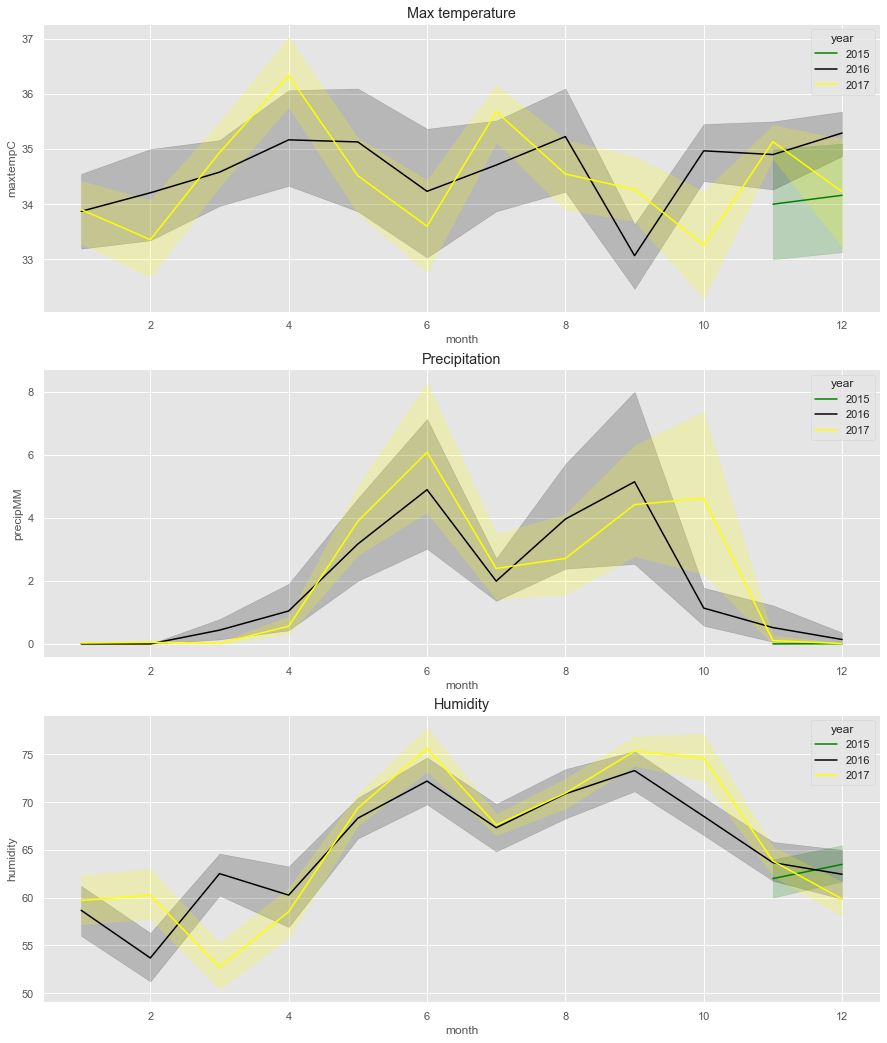

In [56]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=sal_weather,palette=['green','black','yellow'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=sal_weather,palette=['green','black','yellow'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=sal_weather,palette=['green','black','yellow'])
axes[2].set_title('Humidity')

# 8 Guatemala

In [57]:
gat_weather = weather[weather['location'] == 'Guatemala']
gat_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
2975,2015-12-09,23,14,0.0,8.7,5,3,04:37 AM,04:26 PM,06:16 AM,05:33 PM,14,17,18,17,21,29,80,0.0,1014,23,10,11,13,Guatemala,2015,12
2976,2015-12-10,24,14,0.0,8.7,5,0,05:29 AM,05:14 PM,06:16 AM,05:34 PM,14,18,19,18,16,29,79,0.3,1014,24,10,116,9,Guatemala,2015,12
2977,2015-12-11,24,14,0.0,8.7,5,0,06:21 AM,06:05 PM,06:17 AM,05:34 PM,14,18,18,18,18,17,78,0.1,1013,24,10,15,11,Guatemala,2015,12
2978,2015-12-12,25,14,0.0,8.7,6,4,07:14 AM,06:58 PM,06:17 AM,05:34 PM,14,18,19,18,13,17,77,0.0,1013,25,10,39,7,Guatemala,2015,12
2979,2015-12-13,24,14,0.0,8.7,6,12,08:06 AM,07:53 PM,06:18 AM,05:35 PM,14,18,19,18,10,21,80,0.3,1011,24,10,195,7,Guatemala,2015,12


Text(0.5, 1.0, 'Humidity')

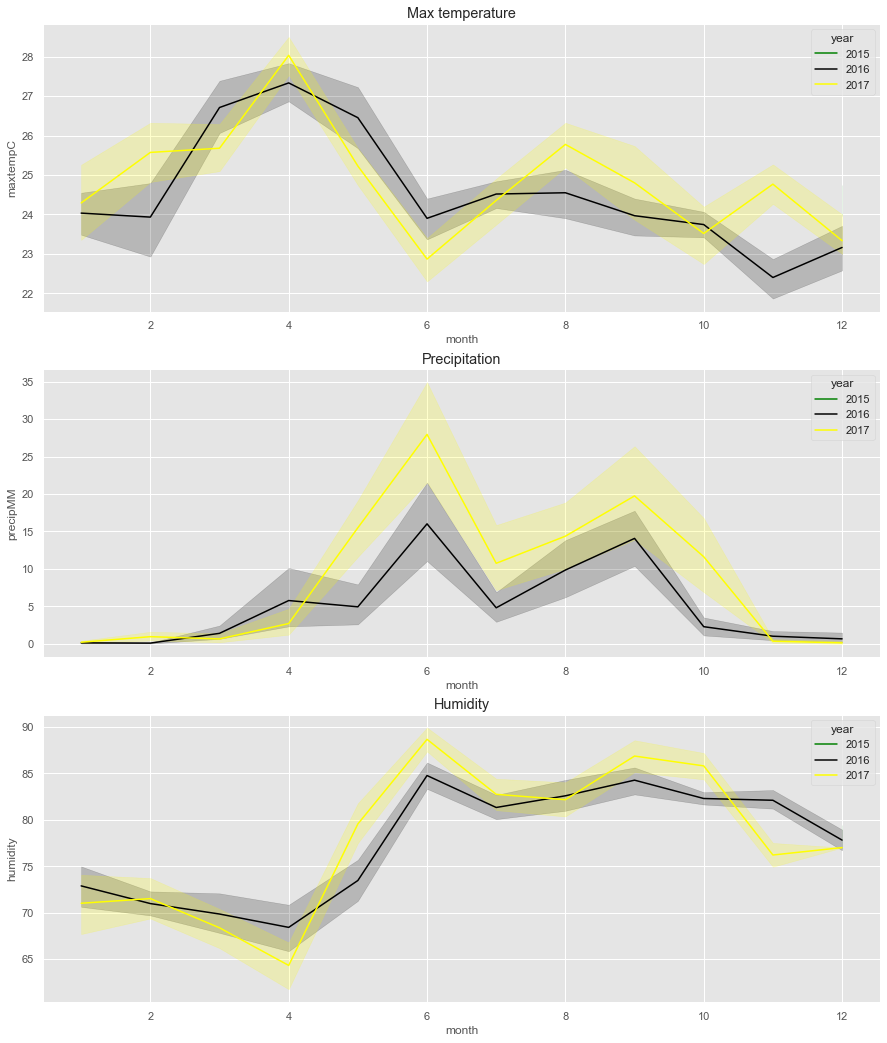

In [60]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=gat_weather,palette=['green','black','yellow'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=gat_weather,palette=['green','black','yellow'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=gat_weather,palette=['green','black','yellow'])
axes[2].set_title('Humidity')

# 9 Mexico

In [62]:
mexico_weather = weather[weather['location'] == 'Mexico']
mexico_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
3702,2015-11-28,25,12,0.0,11.1,5,78,09:56 PM,10:21 AM,07:52 AM,06:57 PM,11,17,17,17,8,16,71,0.0,1017,25,10,210,5,Mexico,2015,11
3703,2015-11-29,28,10,0.0,11.0,5,71,10:51 PM,11:13 AM,07:53 AM,06:57 PM,10,18,18,18,8,9,63,0.0,1017,28,10,57,5,Mexico,2015,11
3704,2015-11-30,29,10,0.0,11.0,6,63,11:45 PM,12:00 PM,07:54 AM,06:57 PM,9,19,19,19,5,5,59,0.0,1014,29,10,194,3,Mexico,2015,11
3705,2015-12-01,30,11,0.0,11.0,6,61,No moonrise,12:43 PM,07:54 AM,06:57 PM,7,20,20,20,5,1,48,0.0,1014,30,10,216,3,Mexico,2015,12
3706,2015-12-02,28,11,0.0,11.0,5,54,12:36 AM,01:24 PM,07:55 AM,06:57 PM,9,18,18,18,5,5,59,0.0,1014,28,10,186,4,Mexico,2015,12


Text(0.5, 1.0, 'Humidity')

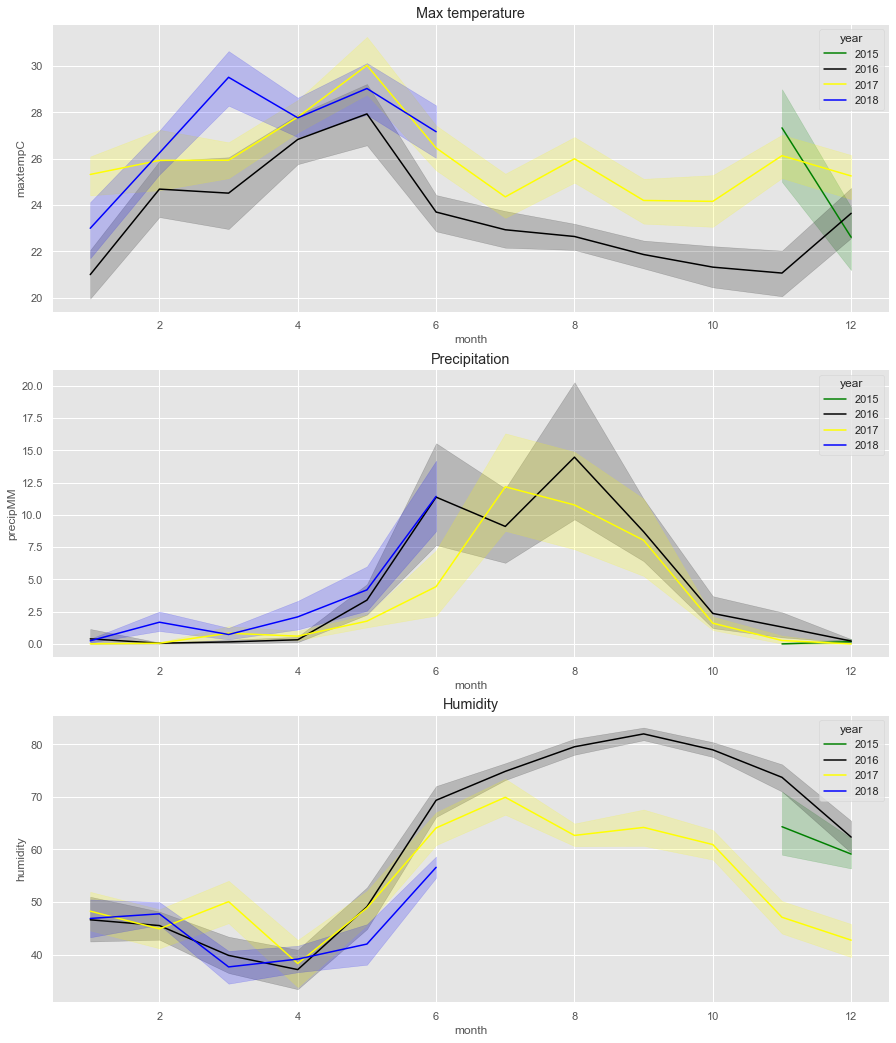

In [66]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=mexico_weather,palette=['green','black','yellow','blue'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=mexico_weather,palette=['green','black','yellow','blue'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=mexico_weather,palette=['green','black','yellow','blue'])
axes[2].set_title('Humidity')

# 10 Nicaragua

In [67]:
nig_weather = weather[weather['location'] == 'Nicaragua']
nig_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
4648,2016-02-09,33,23,0.0,8.7,7,4,06:53 AM,07:05 PM,06:09 AM,05:50 PM,16,28,28,27,35,21,52,0.0,1014,33,10,65,26,Nicaragua,2016,2
4649,2016-02-10,32,22,0.0,8.7,7,12,07:44 AM,08:03 PM,06:08 AM,05:50 PM,14,27,27,26,39,18,49,0.0,1015,32,10,60,29,Nicaragua,2016,2
4650,2016-02-11,33,22,0.0,8.7,7,19,08:33 AM,09:01 PM,06:08 AM,05:51 PM,15,28,28,26,38,18,52,0.0,1014,33,10,66,29,Nicaragua,2016,2
4651,2016-02-12,34,23,0.0,8.7,7,27,09:23 AM,09:59 PM,06:08 AM,05:51 PM,17,29,29,28,39,15,54,0.0,1013,34,10,65,29,Nicaragua,2016,2
4652,2016-02-13,35,23,0.0,8.7,8,34,10:12 AM,10:56 PM,06:07 AM,05:51 PM,18,30,30,28,42,13,56,0.0,1012,35,10,60,31,Nicaragua,2016,2


Text(0.5, 1.0, 'Humidity')

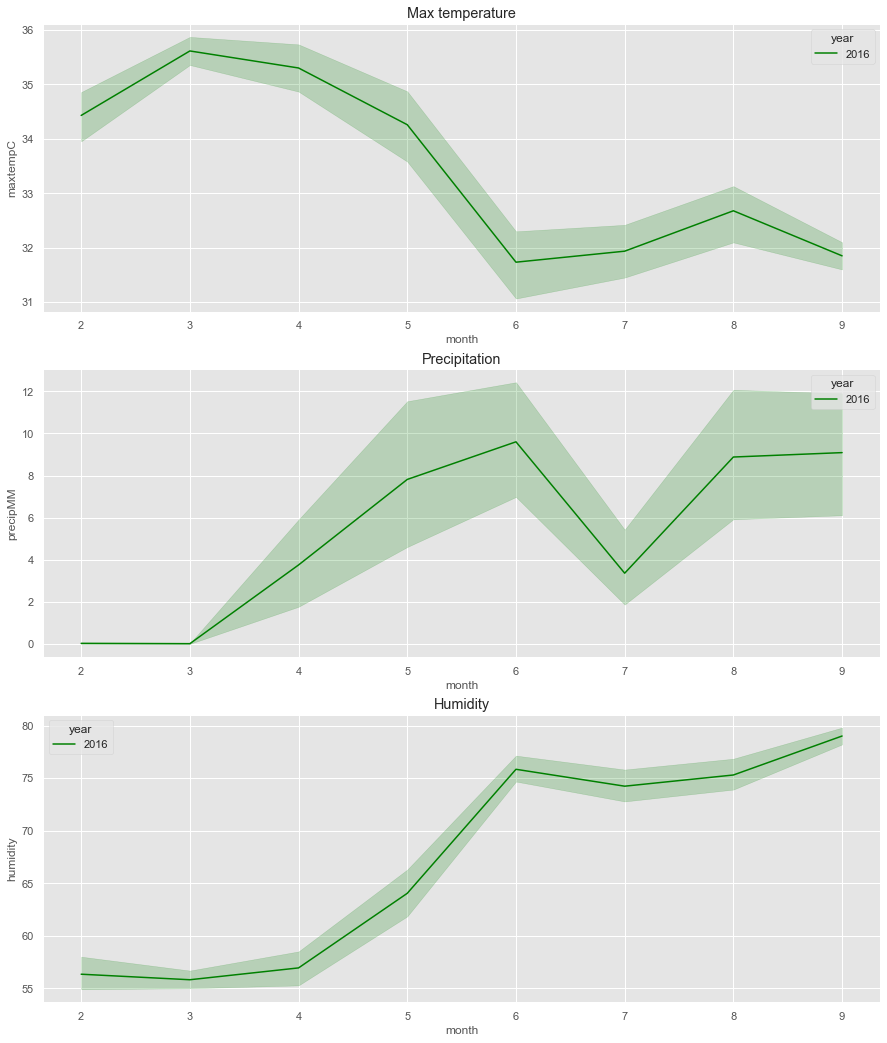

In [71]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=nig_weather,palette=['green'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=nig_weather,palette=['green'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=nig_weather,palette=['green'])
axes[2].set_title('Humidity')

# 11 Panama

In [73]:
pama_weather = weather[weather['location'] == 'Panama']
pama_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
4873,2016-01-06,30,25,0.0,11.6,6,14,03:26 AM,03:28 PM,06:35 AM,06:12 PM,24,30,30,27,15,49,82,7.2,1012,30,9,343,10,Panama,2016,1
4874,2016-01-07,31,25,0.0,8.7,6,7,04:17 AM,04:17 PM,06:35 AM,06:13 PM,23,30,30,27,13,49,79,0.6,1011,31,10,301,8,Panama,2016,1
4875,2016-01-08,31,25,0.0,8.7,6,0,05:10 AM,05:10 PM,06:36 AM,06:14 PM,23,30,30,27,12,54,79,0.2,1011,31,10,298,8,Panama,2016,1
4876,2016-01-09,31,25,0.0,10.2,6,0,06:03 AM,06:05 PM,06:36 AM,06:14 PM,22,30,30,27,13,49,77,0.2,1011,31,10,253,8,Panama,2016,1
4877,2016-01-10,31,24,0.0,11.6,6,0,06:57 AM,07:01 PM,06:36 AM,06:15 PM,22,29,29,26,14,31,78,0.2,1012,31,10,255,9,Panama,2016,1


Text(0.5, 1.0, 'Humidity')

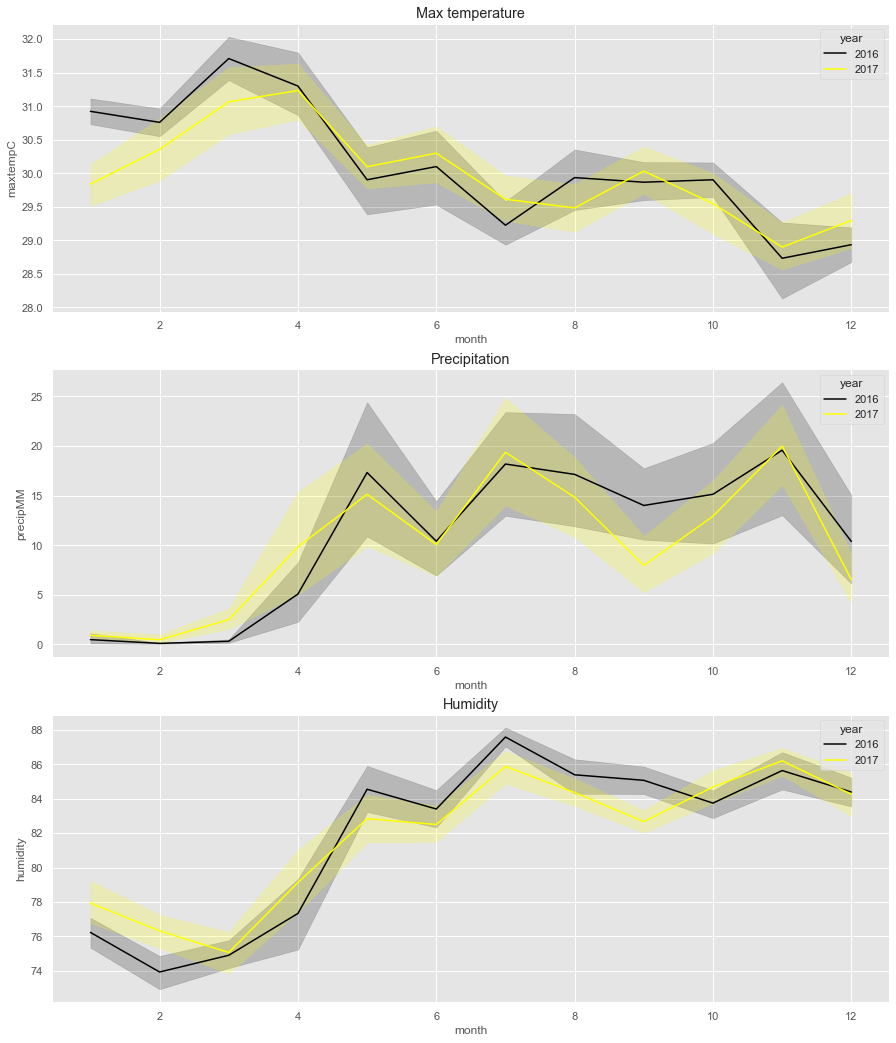

In [78]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=pama_weather,palette=['black','yellow'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=pama_weather,palette=['black','yellow'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=pama_weather,palette=['black','yellow'])
axes[2].set_title('Humidity')

# 12 Puerto Rico

In [80]:
rico_weather = weather[weather['location'] == 'Puerto_Rico']
rico_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
5595,2016-01-27,28,21,0.0,9.5,5,76,08:54 PM,08:15 AM,05:10 AM,06:35 PM,21,26,26,24,11,83,88,3.4,1009,28,6,148,7,Puerto_Rico,2016,1
5596,2016-01-28,31,21,0.0,10.8,6,69,09:29 PM,09:06 AM,05:11 AM,06:35 PM,22,29,29,26,14,50,83,4.2,1010,31,9,61,9,Puerto_Rico,2016,1
5597,2016-01-29,36,22,0.0,13.2,7,61,10:03 PM,09:57 AM,05:11 AM,06:35 PM,22,32,32,28,13,27,74,1.1,1010,36,10,48,8,Puerto_Rico,2016,1
5598,2016-01-30,29,22,0.0,13.2,6,54,10:38 PM,10:47 AM,05:12 AM,06:34 PM,23,29,29,25,12,38,88,13.9,1010,29,8,95,7,Puerto_Rico,2016,1
5599,2016-01-31,25,21,0.0,9.5,5,50,11:16 PM,11:38 AM,05:13 AM,06:34 PM,22,25,25,23,10,83,97,17.6,1011,25,8,80,6,Puerto_Rico,2016,1


Text(0.5, 1.0, 'Humidity')

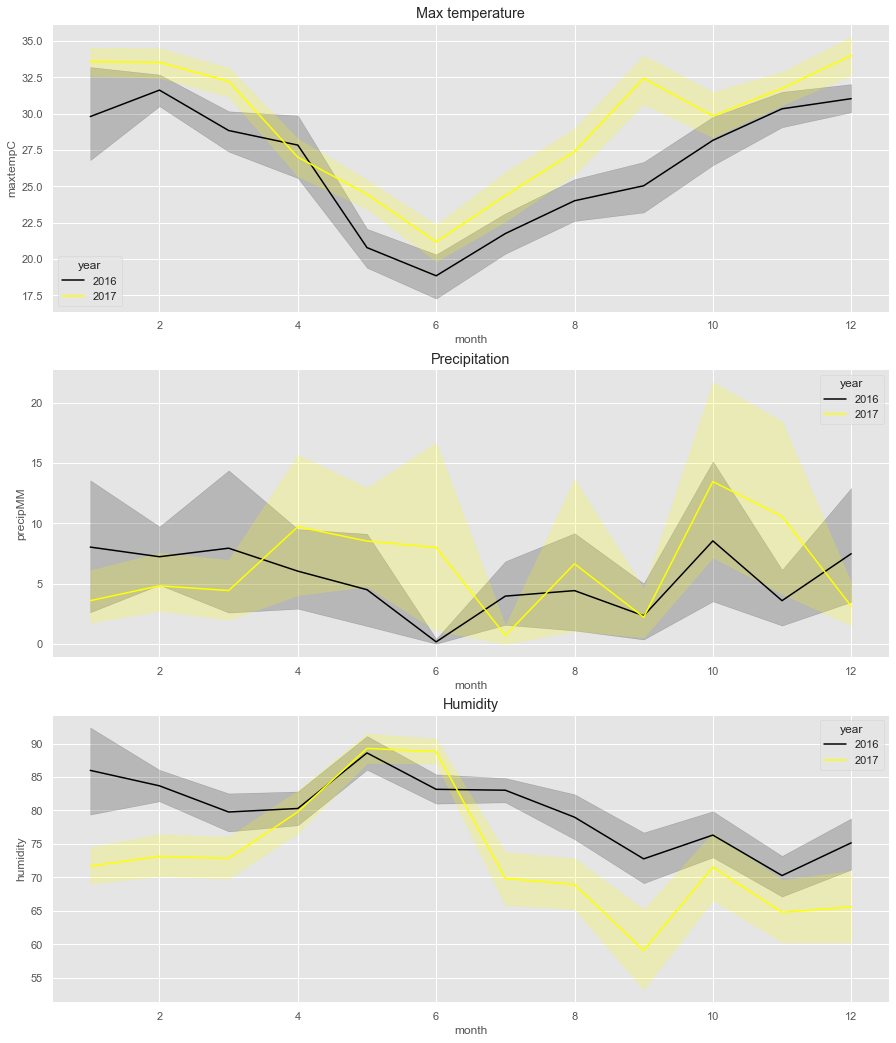

In [81]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=rico_weather,palette=['black','yellow'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=rico_weather,palette=['black','yellow'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=rico_weather,palette=['black','yellow'])
axes[2].set_title('Humidity')

# 13 U.S. Virgin Islands

In [82]:
virgin_weather = weather[weather['location'] == 'Virgin_Islands']
virgin_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
6872,2016-02-24,27,26,0.0,11.6,7,83,08:05 PM,07:47 AM,06:41 AM,06:22 PM,22,29,29,27,36,29,76,0.4,1017,27,10,100,26,Virgin_Islands,2016,2
6873,2016-02-25,27,26,0.0,11.6,6,75,08:53 PM,08:24 AM,06:40 AM,06:23 PM,22,29,29,26,32,36,76,1.4,1017,27,10,92,23,Virgin_Islands,2016,2
6874,2016-02-26,27,26,0.0,11.6,6,68,09:41 PM,09:01 AM,06:40 AM,06:23 PM,21,28,28,26,29,28,74,1.5,1017,27,10,91,21,Virgin_Islands,2016,2
6875,2016-02-27,27,25,0.0,11.6,7,60,10:29 PM,09:40 AM,06:39 AM,06:23 PM,21,28,28,26,22,33,73,0.1,1016,27,10,95,16,Virgin_Islands,2016,2
6876,2016-02-28,27,25,0.0,11.6,6,53,11:18 PM,10:19 AM,06:38 AM,06:24 PM,21,28,28,26,19,14,73,8.6,1016,27,9,105,14,Virgin_Islands,2016,2


Text(0.5, 1.0, 'Humidity')

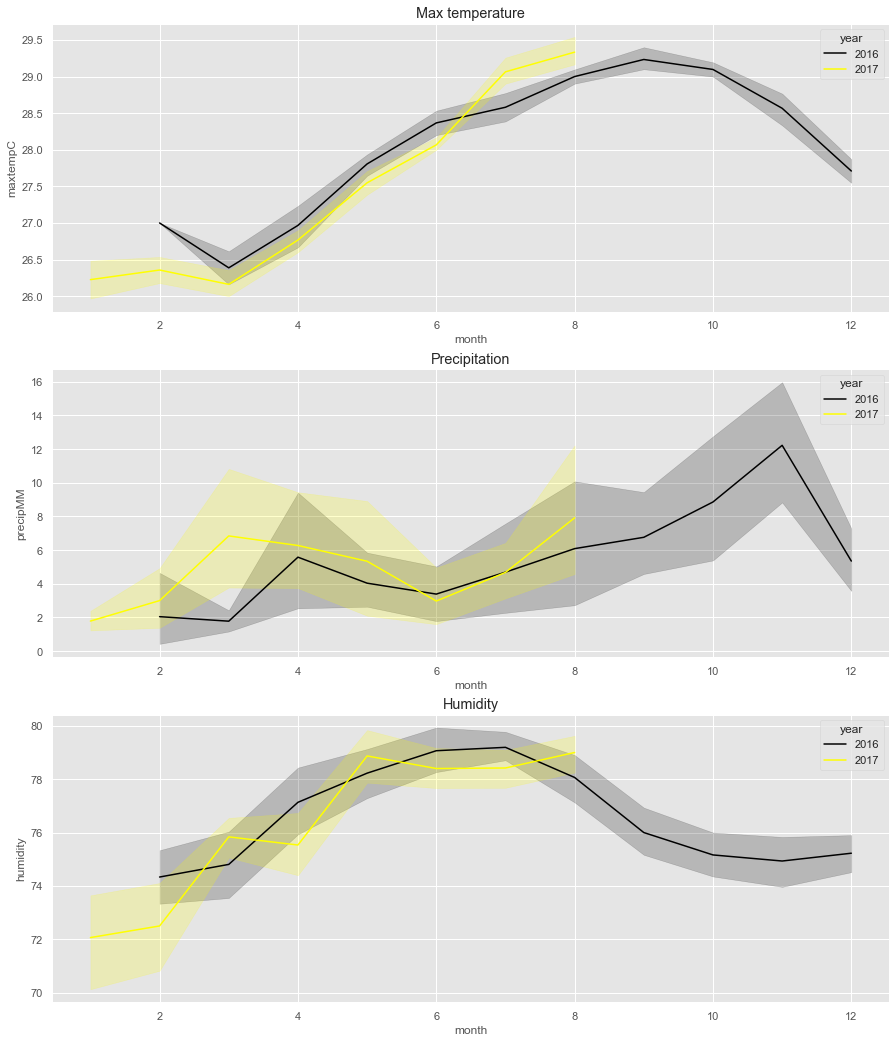

In [83]:
fig, axes = plt.subplots(3, figsize=(15, 18))
sns.lineplot(ax=axes[0], x='month', y='maxtempC', hue='year',data=virgin_weather,palette=['black','yellow'])
axes[0].set_title('Max temperature')

sns.lineplot(ax=axes[1], x='month', y='precipMM', hue='year',data=virgin_weather,palette=['black','yellow'])
axes[1].set_title('Precipitation')

sns.lineplot(ax=axes[2], x='month', y='humidity', hue='year',data=virgin_weather,palette=['black','yellow'])
axes[2].set_title('Humidity')